# Project: Investigate TMDb movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
 In this project, I will try to perform a data analysis for approx 10,000 movies collected from The Movie Database (TMDb).The Movie Database (TMDb) is a community built movie and TV database" https://www.themoviedb.org/about ". The primative descirbition of this dataset as follows 10866 rows and 21 columns. RangeIndex is  10866 entries, dtypes: float64(4), int64(6), object(11).
Columns  to be used through our investigation are:-
>1. budget 
>2. revenue 
>3. original_title
>4. cast
>5. director
>6. runtime 
>7. genres 
>8. production_companies 
>9. vote_average 
>10. release_year
>11. Profit column will be calcluated (revenue -budget)
  
### In this project , I will answer the following questions:
>
>1. Which genres are the most popular?
>2. what are the longest and shortest movies?
>3. Which year has the highest and lowest number of movies?
>4. which year has the best average rating? 
>5. which year has the max and min profit?
>6. what is the relation Profit,budget and revenue?
>7. Which directors directed the highest number of movies?
>8. Which directors achieved the heighest profit?
>9. Which Actors acted the highest no. of movies?

My investigation will result the film profitablity and its relation with other varibles in order to predict if there is a consistent formula for success in such industry or not. I will calculated profit by substract budget_adj from revenue_adj.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing a 'magic word' to visualizations what we are plotted
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

### Load our original Data and creat data frame (df_movie)

In [3]:
#read the csv file
df_data1 = pd.read_csv("tmdb-movies.csv")
df_data=df_data1
df_movie=df_data

In [4]:
#Perform operations to inspect data
df_movie.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [5]:
# Get more info about data
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# show the dataframe shape
df_movie.shape

(10866, 21)

In [7]:
#Generate descriptive statistics.
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning 

In [8]:
# we won't need many columns so we will drop them
df_movie=df_movie.drop(["imdb_id","homepage","overview","tagline","keywords","overview"],axis=1)

In [9]:
# confim drop columns
df_movie.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [10]:
# examine the shape of data frame
df_movie.shape

(10866, 16)

In [11]:
# looking for duplicates
df_movie.duplicated().sum()

1

In [12]:
# Remove the Null value for production_companies,cast, director and genres
df_movie= df_movie[df_movie["production_companies"].notnull()]
df_movie= df_movie[df_movie["cast"].notnull()]
df_movie= df_movie[df_movie["director"].notnull()]
df_movie= df_movie[df_movie["genres"].notnull()]


In [13]:
# examine the shape of data frame after remove null in  production_companies,cast, director and genres
df_movie.shape

(9773, 16)

In [14]:
# Looking for missing values
df_movie.isna().sum()


id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [15]:
# Examine the null again
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 16 columns):
id                      9773 non-null int64
popularity              9773 non-null float64
budget                  9773 non-null int64
revenue                 9773 non-null int64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null object
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


In [16]:
# Create data frame df_gen for genres and using pandas Dummies to eliminate (|)
df_gen=df_movie['genres'].str.get_dummies(sep='|')

In [17]:
#create new  profit data frame 
df_profit=df_data.copy()
# creat profit column
df_profit['profit']= df_data['revenue_adj'] - df_data['budget_adj']

In [18]:
#create new  profit data frame (df_profit1) by dropping unwanted columns from (df_profit)
df_profit1 =df_profit.drop([ 'imdb_id','homepage','tagline','original_title','release_date','cast','production_companies','genres','runtime','popularity','keywords', 'overview','vote_count', 'vote_average'],axis=1)

In [19]:
df_dir =df_data.drop([ 'imdb_id','homepage','tagline','cast','production_companies','genres','runtime','popularity','keywords', 'overview','vote_count', 'vote_average','budget','revenue', 'budget_adj','revenue_adj'],axis=1)

### Summery of Data  Wrangling 
Data Wrangling involve Identifying and dealing with missing values inaddation to transform the data to a more effective state to target the analysis thourgh these steps:

>- Drop  unwanted  columns (imdb_id","homepage","overview","tagline","keywords","overview","release_date","vote_count) from df_movie data frame.
>- Look for instances of missing or possible errant data.
>- Remove  Null  in columns (director , Production_companies , genres and  cast ) as it can't be fill(fillna method) with data like mean or data from above row .
>- Examine the duplicate value( one value, no action taken in this step).
>- create data frame (df_gen) for genres and using pandas Dummies to eliminate (|)
>- Create new  profit data frame(df_profit1)by dropping unwated columns in df_profit.
>- Create profit column(profit=revenue_adj - budget_adj) for fair comparison with old  movies reference to 2010 inflation.
>- Create dataframe for director(df_dir) and drop unwated cloumns.



<a id='eda'></a>
## Exploratory Data Analysis
In this section , I tried to answer the mentioned question in Introduction Section

### Q.1. Which genres are the most popular?

In [20]:
# remove the (|) from genres column 
df_gen1=df_gen.sum().reset_index()
df_gen1

,index,0
0,Action,2236
1,Adventure,1384
2,Animation,617
3,Comedy,3433
4,Crime,1300
5,Documentary,317
6,Drama,4365
7,Family,1095
8,Fantasy,840
9,Foreign,120


### Plotting  a Bar plot between Genres and Counts over Years.

<function matplotlib.pyplot.show(*args, **kw)>

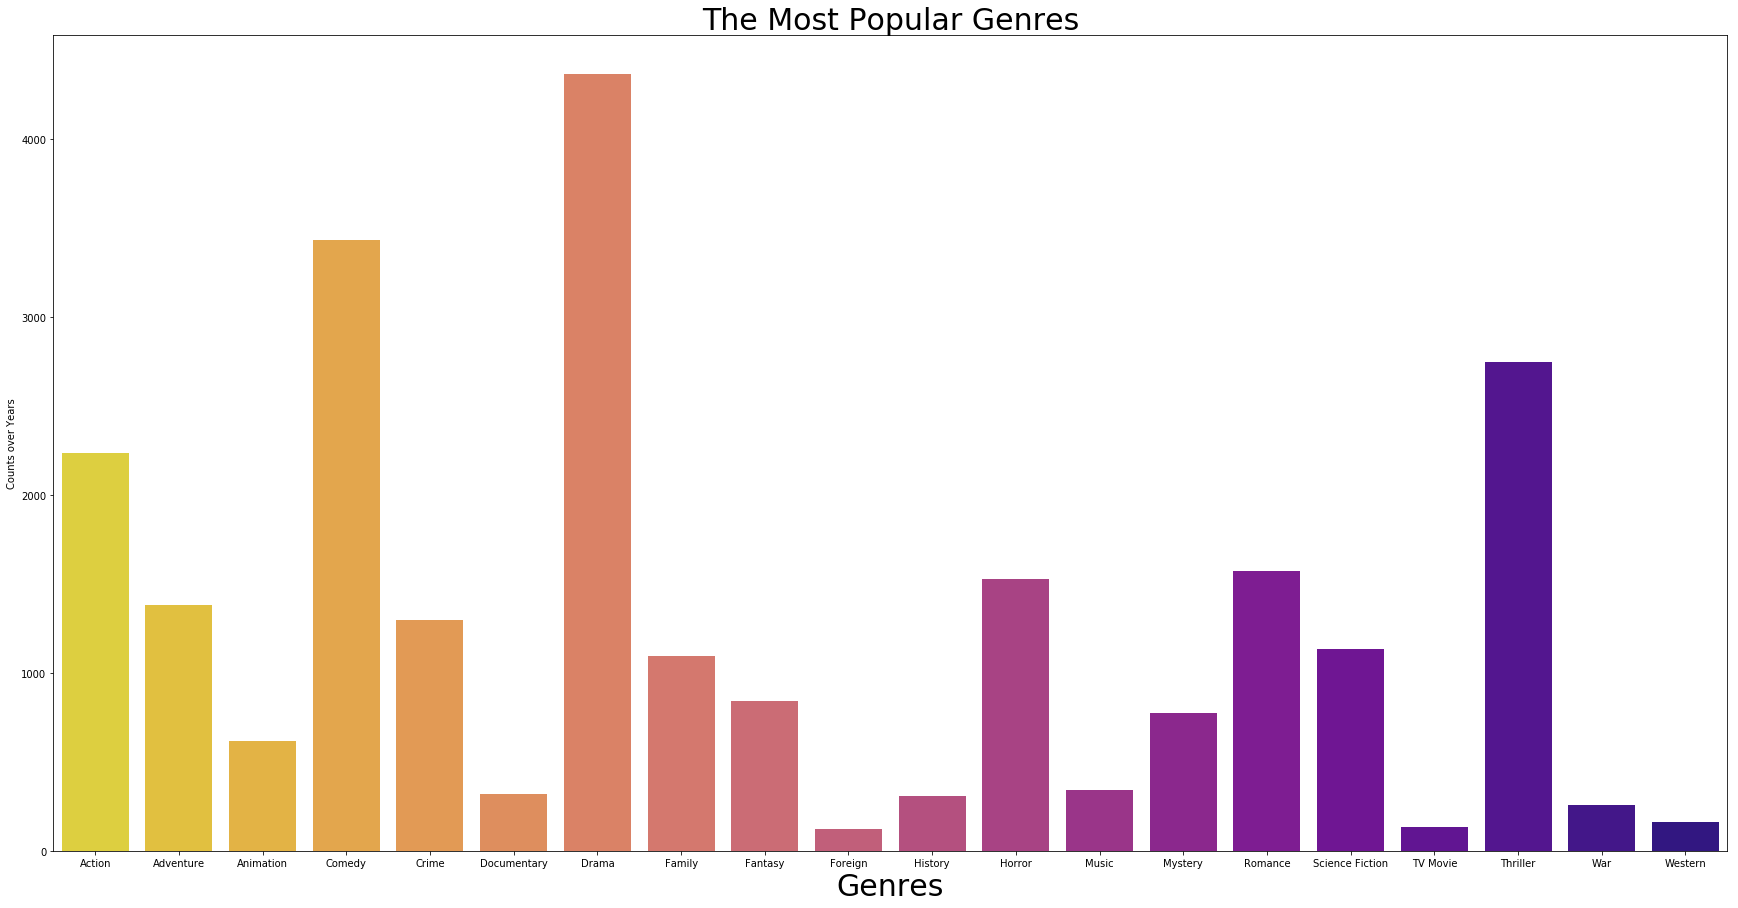

In [21]:
#setup the figure size.
plt.figure(figsize=(30,15))
# plot the Df_gen
sns.barplot(x=df_gen.columns, y=df_gen.sum(), data=df_gen1, palette='plasma_r')
# plot labels for title, x and y axis
plt.ylabel('Counts over Years')
plt.xlabel("Genres", fontsize=30)
plt.title('The Most Popular Genres',fontsize=30)
plt.show

### * From the above figure it's appeared that Drama is the most popular genres over the years.

### Q. 2. What are the longest and shortest movies?

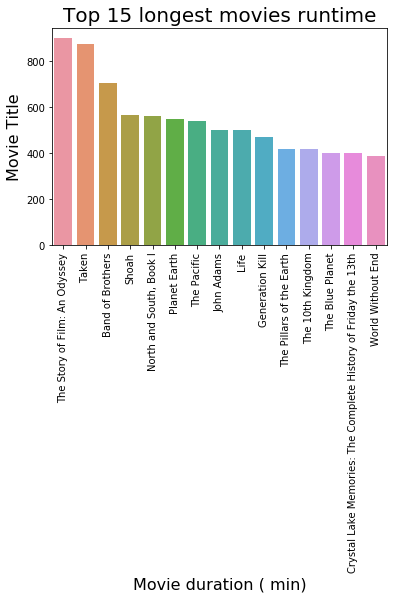

In [22]:
# Create new dataFrame with two columns for runtime and movie title
df_movie_runtime = pd.DataFrame(df_data["runtime"].sort_values(ascending=False))
df_movie_runtime['original_title'] = df_data['original_title'].apply(lambda x: str(x))
df_long= df_movie_runtime.head(15)

#plot figure for the longest 15 movies runtime
sns.barplot(x=df_long["original_title"], y=df_long["runtime"], data=df_long);
# plot labels for title, x and y axis
plt.title("Top 15 longest movies runtime",fontsize = 20);
plt.ylabel('Movie Title',fontsize = 16);
plt.xlabel('Movie duration ( min)',fontsize = 16);
# change the oratation of xticks to 90
plt.xticks(rotation=90)
plt.show()

### * It appered from the figure that the longest 15 movies as follows:
	   Runtime(min)   Title of movie
>*  900    -The Story of Film: An Odyssey
>*	877	   -Taken
>*	705	   -Band of Brothers
>*	566	   -Shoah
>*	561	   -North and South, Book I
>*	550	   -Planet Earth
>*	540	   -The Pacific
>*	501	   -John Adams
>*	500	   -Life
>*	470	   -Generation Kill
>*	421	   -The Pillars of the Earth
>*	417	   -The 10th Kingdom
>*	400	   -The Blue Planet
>*	400	   -Crystal Lake Memories: The Complete History of...
>*	389	   -World Without End


In [23]:
#Top 15 longest movies runtime
df_long

,runtime,original_title
3894,900,The Story of Film: An Odyssey
4041,877,Taken
2722,705,Band of Brothers
6176,566,Shoah
6181,561,"North and South, Book I"
6894,550,Planet Earth
2214,540,The Pacific
3356,501,John Adams
1865,500,Life
3141,470,Generation Kill


In [24]:
# Print the longest movie name with runtime  
print (df_data.original_title[df_data.runtime==df_data.runtime.max()])
print(df_data.runtime[df_data.runtime==df_data.runtime.max()])

3894    The Story of Film: An Odyssey
Name: original_title, dtype: object
3894    900
Name: runtime, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

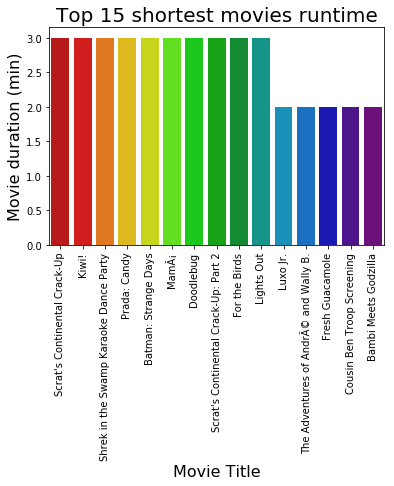

In [25]:
# For the shortest movie runtime, remove the movies with runtime=zero  in new data frame (df_short1).
df_movie_runtime.drop(df_data.query('runtime==0').index,inplace=True)
df_short1 = df_movie_runtime.tail(15)

# plot bar Figure for shortest 15 movies runtime
sns.barplot(x=df_short1["original_title"],y=df_short1["runtime"],data=df_short1,palette='nipy_spectral_r' );
# plot labels for title, x and y axis
plt.title("Top 15 shortest movies runtime",fontsize = 20);
plt.ylabel('Movie duration (min)',fontsize = 16);
plt.xlabel('Movie Title',fontsize = 16);
plt.xticks(rotation=90)

In [26]:
# show the list of 15 movies with the shortest runtime
df_short1

,runtime,original_title
2232,3,Scrat's Continental Crack-Up
6930,3,Kiwi!
2830,3,Shrek in the Swamp Karaoke Dance Party
5934,3,Prada: Candy
1112,3,Batman: Strange Days
3298,3,MamÃ¡
5399,3,Doodlebug
3891,3,Scrat's Continental Crack-Up: Part 2
8706,3,For the Birds
5993,3,Lights Out


### It appered from the the figure that top 15 shortest movies runtime as follow:
>- Scrat's Continental Crack-Up
>-	Kiwi!
>-	Shrek in the Swamp Karaoke Dance Party
>-	Prada: Candy
>-	Batman: Strange Days
>-  MamÃ¡
>-	Doodlebug
>-	Scrat's Continental Crack-Up: Part 2
>- For the Birds
>- Lights Out
>- Luxo Jr.
>- The Adventures of AndrÃ© and Wally B.
>- Fresh Guacamole
>- Cousin Ben Troop Screening
>- Bambi Meets Godzilla

### Q. 3.  Which year has the highest and lowest number of movies?

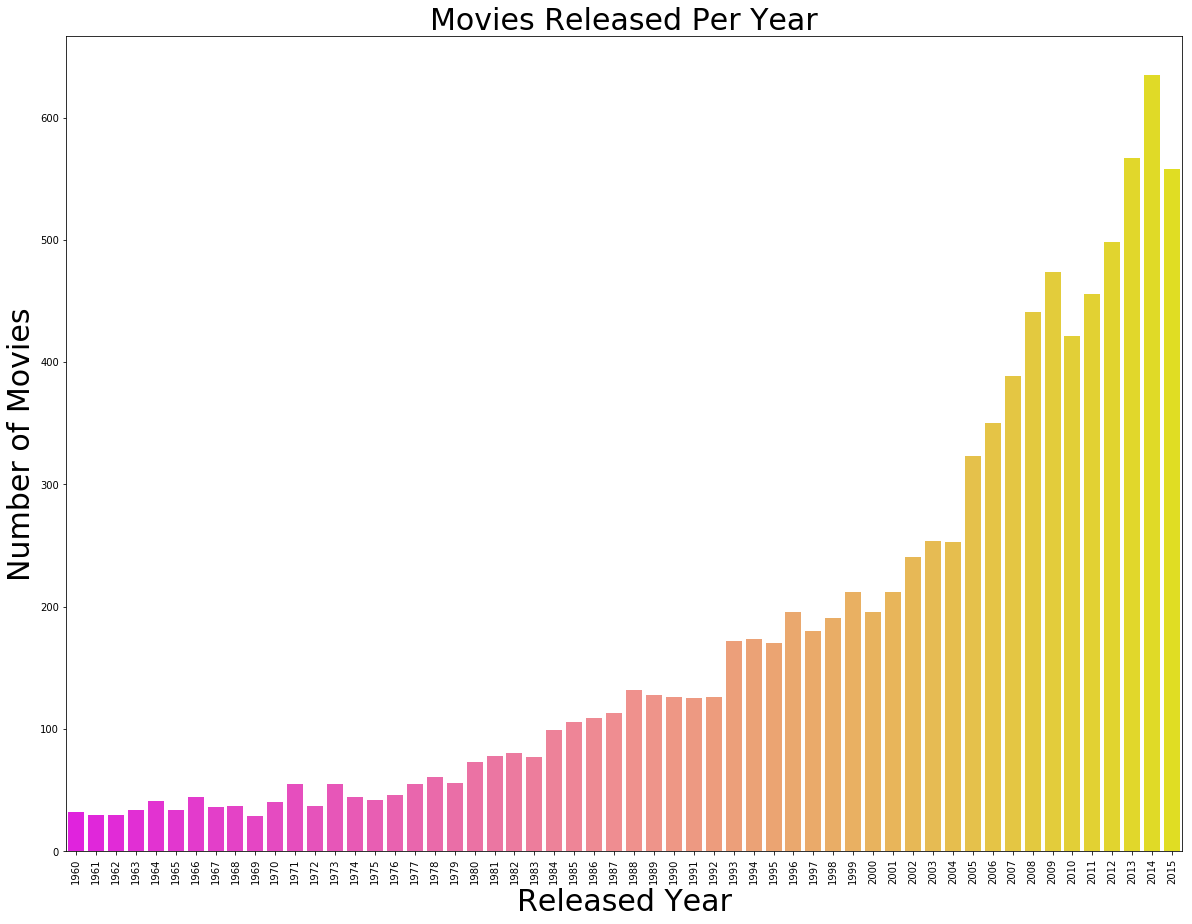

In [27]:
#Show visualization for the highest and lowest number of movies per year
plt.figure(figsize=(20,15))
sns.countplot(df_movie['release_year'],palette='spring')
# plot labels for title, x and y axis
plt.title('Movies Released Per Year', fontsize=30)
plt.xlabel('Released Year',fontsize=30)
plt.ylabel('Number of Movies',fontsize=30)
plt.xticks(rotation=90)
plt.show()

In [28]:
print('The heightest number of movies were released  in 2014 =',format(df_movie['release_year'][df_movie['release_year']==2014].count()),"movies")

The heightest number of movies were released  in 2014 = 635 movies


In [29]:
print('The lowest number of movies were released  in 1969 =',format(df_movie['release_year'][df_movie['release_year']==1969].count()),"movies")

The lowest number of movies were released  in 1969 = 29 movies


### Q.4. which year has the best average rating?

Text(0.5,1,'Vote Counts per Years')

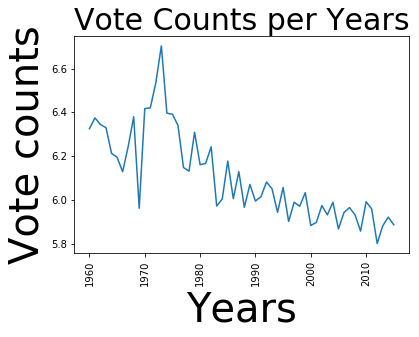

In [30]:
#plot the number of movies produced per each(1960-2016)
df_vote=df_data.groupby("release_year").mean()["vote_average"]
#visualistion by using NumPy and seaborn
df_vote.plot(xticks = np.arange(1960,2016,10))
sns.set(style='dark', rc={'figure.figsize':(30,15)})

# plot labels for title, x and y axis
plt.ylabel('Vote counts',fontsize=40)
plt.xlabel('Years',fontsize=40)
plt.xticks(rotation=90)
plt.title('Vote Counts per Years', fontsize=30)


#### The figure shows max. vote counts per year at 1970

In [31]:
print("The best average rate = {} in {} ".format(df_vote.max(), df_vote.idxmax()))
      

The best average rate = 6.703636363636363 in 1973 


## Q.5.  Which year has the max and min profit?

In [32]:
# Budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation overtime.
#Check if there are budgets and revenues equal zero and delete them to avoid statistics mistakes.
print(" Number of movies before deleting zero budgets and zero revenues movies ={}".format(df_profit.shape[0]))

#filter all zero budget rows 
df_profit1= df_profit1[df_profit1["budget_adj"]>0]

#filter all zero revenue rows 
df_profit1= df_profit1[df_profit1["revenue_adj"]>0]
# Print remaining no. of rows after applying filters
print(" Number of movies after droping zero value for Budgets & revenues movies ={}".format(df_profit1.shape[0]))


 Number of movies before deleting zero budgets and zero revenues movies =10866
 Number of movies after droping zero value for Budgets & revenues movies =3855


In [33]:
#create data frame for Max profit  
df_profit = pd.DataFrame( df_profit['profit'].sort_values(ascending=False))
df_profit['original_title'] = df_data['original_title'] +" "+ df_data['release_year'].apply(lambda x: str(x))
Max_profit = df_profit.head(10)
Max_profit

,profit,original_title
1329,2.750137e+09,Star Wars 1977
1386,2.586237e+09,Avatar 2009
5231,2.234714e+09,Titanic 1997
10594,2.128036e+09,The Exorcist 1973
9806,1.878643e+09,Jaws 1975
8889,1.767968e+09,E.T. the Extra-Terrestrial 1982
3,1.718723e+09,Star Wars: The Force Awakens 2015
8094,1.551568e+09,The Net 1995
10110,1.545635e+09,One Hundred and One Dalmatians 1961
7309,1.376998e+09,The Empire Strikes Back 1980


#### The movie named Star Wars released in  1977 achieved 2.750137e+09 US$

In [34]:
# creat dta frame df2 from df_profit by dropping additional columns
df2=df_profit1.drop(['budget','revenue'],axis=1)

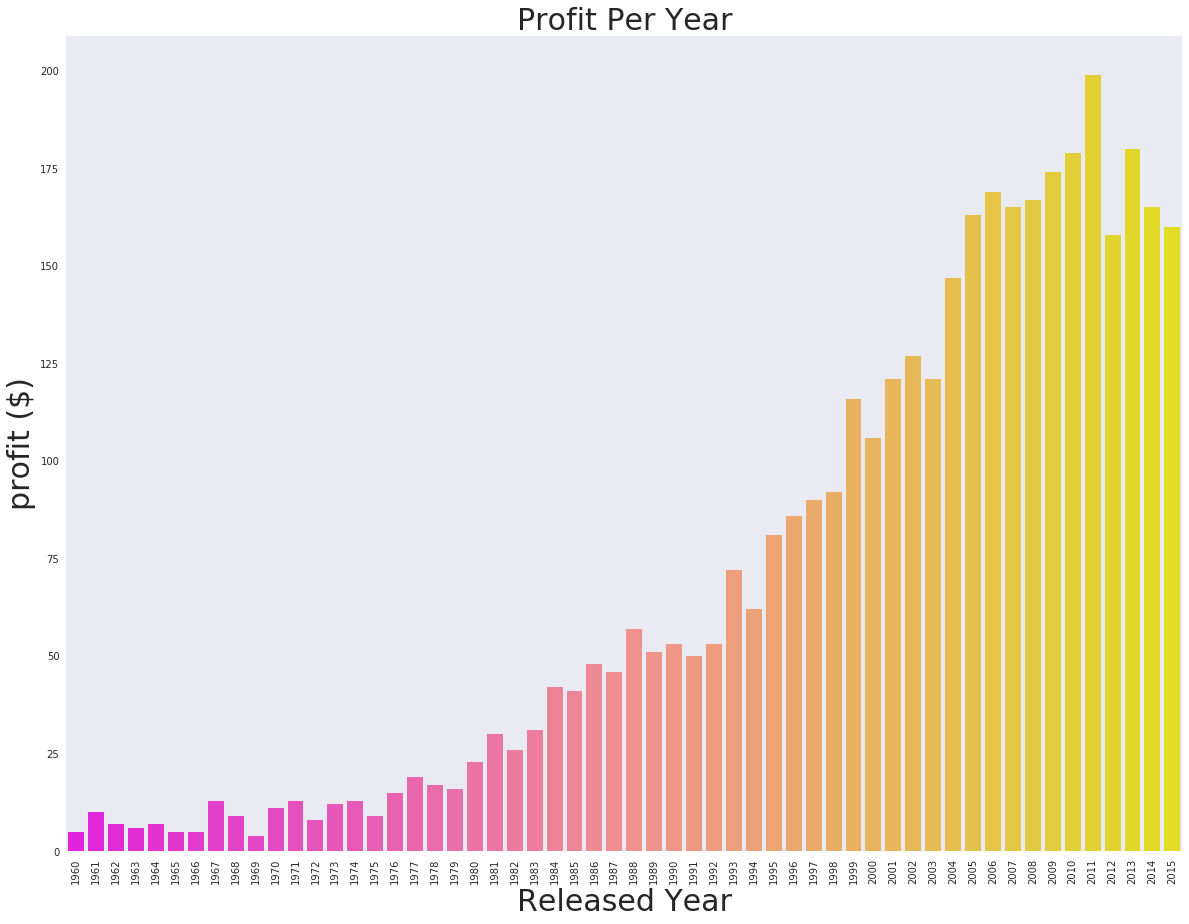

In [35]:
#Draw the relation between Profit and Year
plt.figure(figsize=(20,15))
sns.countplot(df2['release_year'],palette='spring')
#show label for  title, x axis and y-axis
plt.title('Profit Per Year', fontsize=30)
plt.xlabel('Released Year',fontsize=30)
plt.ylabel('profit ($)',fontsize=30)
plt.xticks(rotation=90)
plt.show()

In [36]:
print('The max profit were achived in 2011 =',df2['profit'].max(),"$")


The max profit were achived in 2011 = 2750136650.92 $


In [37]:
print('The min profit were achived in 1960 =', df2['profit'].min(),"$")

The min profit were achived in 1960 = -413912431.0 $


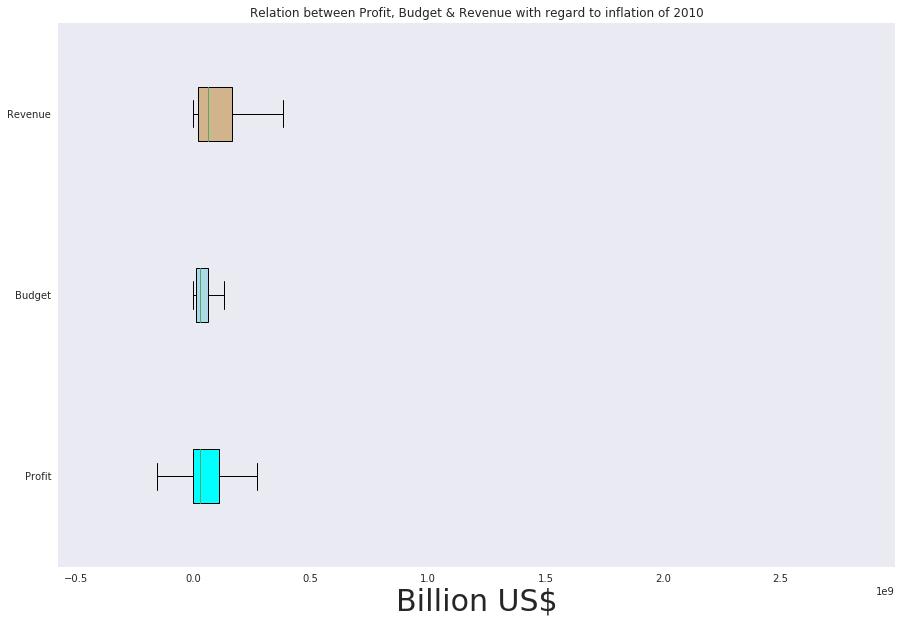

In [38]:
#plot a box figure for profit, budget and revenue with regard to inflation of 2010
fig = plt.figure(figsize =(15, 10))
profit=df_profit1['profit']
budget=df_profit1['budget_adj']
revenue=df_profit1['revenue_adj']
box_plot_data=[profit,budget,revenue]
box=plt.boxplot(box_plot_data,vert=0,patch_artist=True, labels=['Profit','Budget','Revenue'])
colors = ['cyan', 'lightblue', 'tan']
# Adding title 
plt.title("Relation between Profit, Budget & Revenue with regard to inflation of 2010")
plt.xlabel('Billion US$',fontsize=30)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()


### This box figure illustrate the relation between Profit, Budget and Revenue, which can be expressed in numbers as follow:

>* mean of budget_adj= 4.423630e+07, max value = 4.250000e+08 and min value 9.693980e-01 US Dollar
>* mean of Profit= 9.279309e+07, max value = 2.750137e+09 and min value -4.139124e+08 US dollar
>* mean of revenue_adj= 1.370294e+08, max value = 2.827124e+09 and min value 2.370705e+00 US dollar


In [39]:
df_profit1.describe()

,id,budget,revenue,release_year,budget_adj,revenue_adj,profit
count,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3.855000e+03,3.855000e+03,3.855000e+03
mean,39888.783398,3.720183e+07,1.076589e+08,2001.263294,4.423630e+07,1.370294e+08,9.279309e+07
std,67213.815955,4.220291e+07,1.765248e+08,11.281989,4.480403e+07,2.160944e+08,1.940562e+08
min,5.000000,1.000000e+00,2.000000e+00,1960.000000,9.693980e-01,2.370705e+00,-4.139124e+08
25%,6074.000000,1.000000e+07,1.357645e+07,1995.000000,1.309053e+07,1.834123e+07,-1.507157e+06
50%,11322.000000,2.400000e+07,4.479322e+07,2004.000000,3.001558e+07,6.171861e+07,2.736550e+07
75%,38577.000000,5.000000e+07,1.241530e+08,2010.000000,6.061307e+07,1.632401e+08,1.074152e+08
max,417859.000000,4.250000e+08,2.781506e+09,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


### Q. 6. What is the relation between profit, budget and revenue?

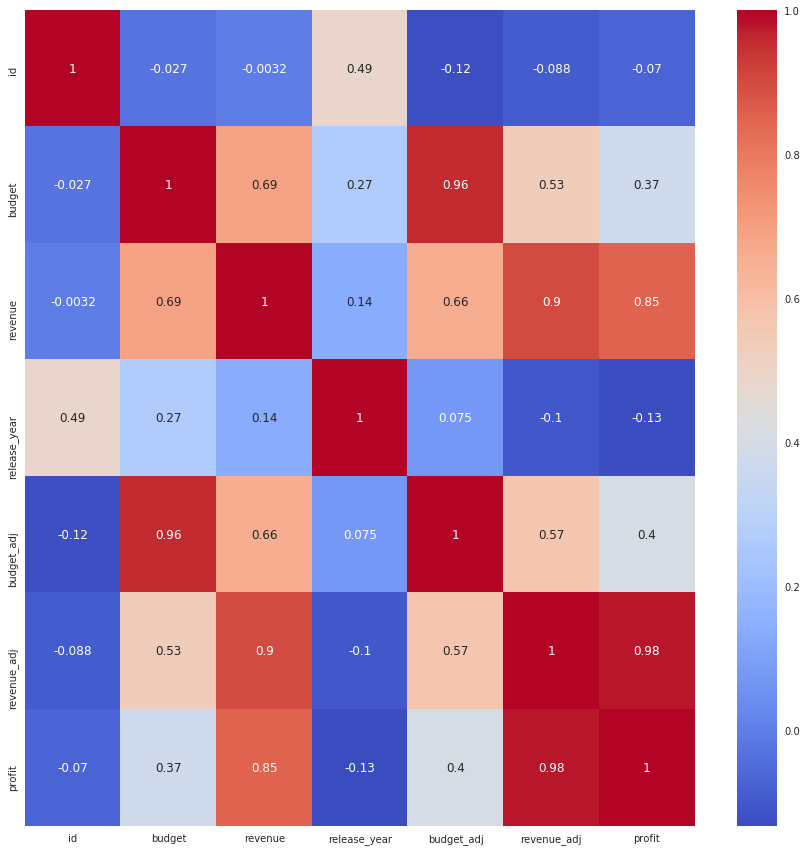

In [40]:
# plot heatmap between profit, budget and revenue to find the relation including inflation of 2010
a=df_profit1.corr()
plt.figure(figsize=(15,15))
sns.heatmap(a,cmap='coolwarm', annot=True)
plt.show()

### From above heatmap, it is cleared that:

>* The relation between increasing revenue and the high budget = 0.69
>* The relation between profit and revenue is = 0.85
>* The relation betwwen Buddget_adj and revenue_adj =0.57
>* The relation betwwen profit and Buddget_adj= 0.4
>* The relation betwwen Buddget_adj and budget= 0.96


### Q.7. Which directors directed the highest no. of movies ?

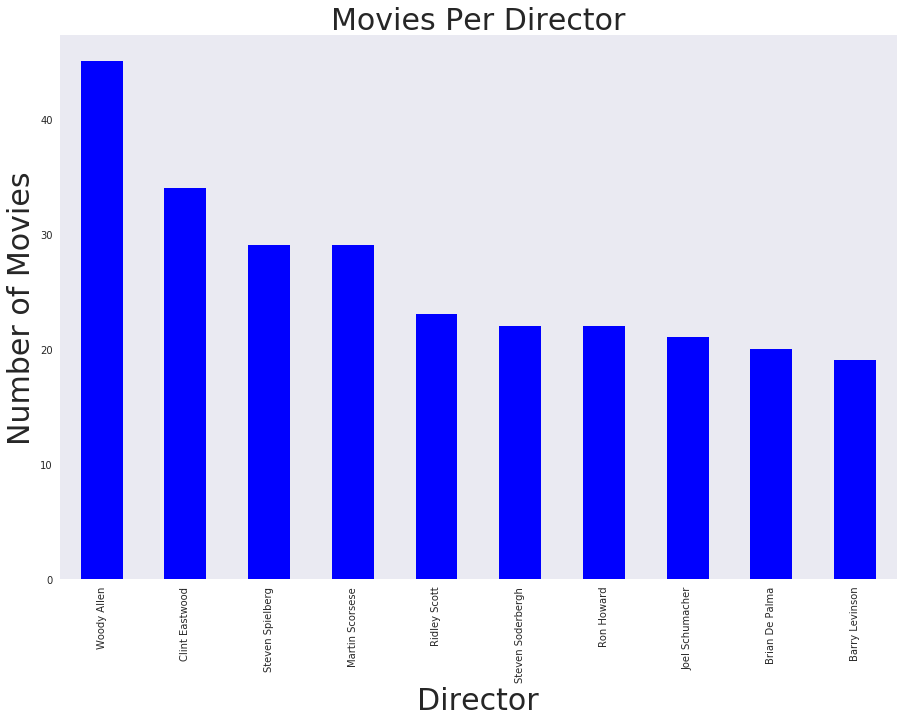

In [41]:
#Plot bar figure between director and Number of Movies
df_data['director'].value_counts().head(10).plot.bar(figsize=(15,10),color='Blue')

#show labels of Title , Xand y axis
plt.title('Movies Per Director', fontsize=30)
plt.xlabel('Director',fontsize=30)
plt.ylabel('Number of Movies',fontsize=30)
plt.xticks(rotation=90)
plt.show()

### From the above bar figure , it is cleared that,  Woody Allen has directed the heighest number of movies = 45 movies.

In [42]:
#Top 15 directors who directed the heighest number of movies  
Top_10 = df_dir.groupby('director').original_title.count().sort_values(ascending=False).head(10)
Top_10

director
Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Wes Craven           19
Name: original_title, dtype: int64

In [43]:
print('The director who directed the highest no. of movies is Woody Allen with ',Top_10.max(),'movies')

The director who directed the highest no. of movies is Woody Allen with  45 movies


### Q.8. Which directors achieved the heighest profit?

In [44]:
# Create new data frame filled with profit and directors data columns
df_pro= df_data.copy()

#Calculate profit in new data frame df_pro
df_pro["profit"]=df_pro["revenue_adj"]-df_pro["budget_adj"]
df_pro_Dir = pd.DataFrame( df_pro["profit"].sort_values(ascending=False))
df_pro_Dir['director'] = df_data['director'] 

#show the 5 directors with achieved the high profit
df_pro_Dir.head(5)

,profit,director
1329,2.750137e+09,George Lucas
1386,2.586237e+09,James Cameron
5231,2.234714e+09,James Cameron
10594,2.128036e+09,William Friedkin
9806,1.878643e+09,Steven Spielberg


In [45]:
print('The director who achive the heighest profit is George Lucas with the effect of inflation of 2010 with ', df_pro_Dir['profit'].max(),'$')

The director who achive the heighest profit is George Lucas with the effect of inflation of 2010 with  2750136650.92 $


### Q. 9. Which Actors achieved the highest number of movies?

In [46]:
# create dataframe all_staff
all_staff = df_data['cast'].str.cat(sep='|')
# use pandas.Series.str.cat to split ('|') 
best_20_actors = pd.Series(all_staff.split('|')).value_counts().head(20)

Text(0,0.5,'Total Movies')

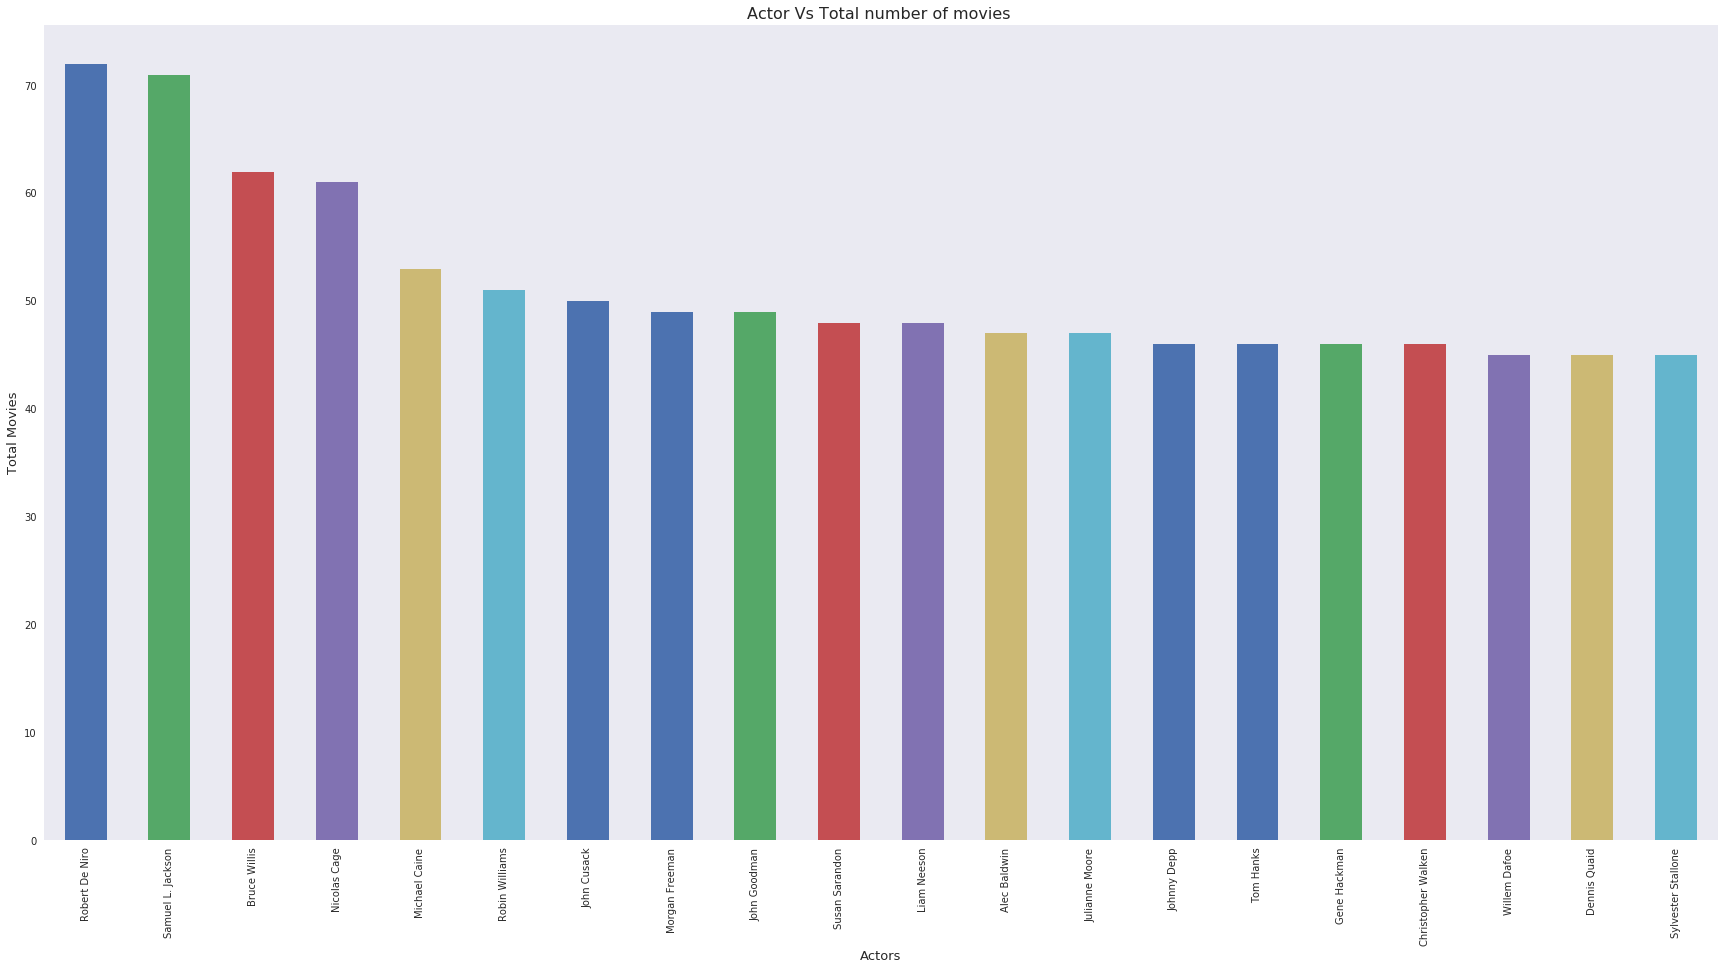

In [47]:
# plot bar figure between Actor and  Total no. of movies
best_20_actors.plot(kind='bar')
# show labels of  tiltle, x and y axis
plt.title("Actor Vs Total number of movies ",fontsize = 16);
plt.xlabel('Actors',fontsize = 13);
plt.ylabel('Total Movies',fontsize = 13)

### Bar figure shows the relation between Actors and the number of movies. It  is cleared that  Robert De Niro  has 72 movie, so he is  on the top of 20 actors.

In [48]:
# show the top 20 actors reference to the number of movie they participated
best_20_actors

Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
Michael Caine         53
Robin Williams        51
John Cusack           50
Morgan Freeman        49
John Goodman          49
Susan Sarandon        48
Liam Neeson           48
Alec Baldwin          47
Julianne Moore        47
Johnny Depp           46
Tom Hanks             46
Gene Hackman          46
Christopher Walken    46
Willem Dafoe          45
Dennis Quaid          45
Sylvester Stallone    45
dtype: int64

<a id='conclusions'></a>
## Conclusions

Finally, we reached the end of our TMD dataset analyze journey to find out the recipe  or  a consistent formula for success in this industry if it's exist,through the answer of the mentioned questions inthe start of this exploring jouerny. My investigation came with answers as follow:

>1. It's appeared that Drama is the most popular genres over the years
>2. The Story of Film: An Odyssey with 900 min runtime is the longest movie ever although the average runtime is 102 min in this dataset.
>3. The highest number of movies were released in 2014 = 635 movies.
>4. The lowest number of movies were released in 1969 = 29 movies.
>5. The best average rate = 6.703636363636363  was in 1973.
>6. The max profit were achieved in 2011 =2544505847 US dollar (with the effect of inflation of 2010).
>7. The min profit were achieved in 1960 = -413912431 US dollar(with the effect of inflation of 2010).
>8. The director who directed the highest no. of movies is Woody Allen with 45 movies.
>9. The director who achieve the highest profit is James Cameron with the effect of inflation of 2010 =2750136650.92 US dollar.
>10. Robert De Niro achieved the highest no. of movies which is 72 movie.
>11. Revenue has a strong relation with the budget as Movies with higher budgets shown a corresponding increase in the revenues as follows.
>12. The relation between Profit , budget and revenue with and without effect of inflation of 2010:
>>* The relation between increasing revenue and the high budget = 0.69
>>* The relation between profit and revenue is = 0.85
>>* The relation betwwen Buddget_adj and revenue_adj =0.57
>>* The relation betwwen profit and Buddget_adj= 0.4
>>* The relation betwwen Buddget_adj and budget= 0.96

### limitations:

>1. The  analysis is limited to only the provided TMBD Movies dataset. For example, the dataset does not confirm that every..  release of every director is listed.
>2. There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is        limited to the numerical values of revenue.
>3. Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias        towards the relationship being analyzed. etc.


## References
>1. https://pandas.pydata.org/docs/user_guide/visualization.html
>2. https://guides.github.com/features/mastering-markdown/
>3. https://ipython.readthedocs.io/en/stable/interactive/magics.html
>4. https://stats.stackexchange.com/questions/60856/what-is-the-best-way-to-visualize-relationship-between-discrete-and-continuous-v
>5. https://www.geeksforgeeks.org/reshape-a-pandas-dataframe-using-stackunstack-and-melt-method/
>6. https://www.kaggle.com/learn/python
>7. https://nfpdiscussions.udacity.com/c/data-questions-hub/data-professional-track-questions-hub/35
>8. https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet
>9. https://pandas.pydata.org/docs/reference/api/pandas.Series.str.cat.html
>10. http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0